# Script de exemplo de aplicação de regressão linear
O objetivo é apresentar um exemplo de regressão linear utilizando a biblioteca python Scikit-learn

## O que é regressão linear?
Regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou preditoras). A ideia principal por trás da regressão linear é encontrar uma equação linear que melhor descreva a relação entre essas variáveis, de modo que possa ser usada para fazer previsões ou entender o comportamento dos dados.

A forma mais simples de regressão linear é a regressão linear simples, que envolve apenas uma variável independente e uma variável dependente. A equação da linha de regressão é expressa como:

$$ y=mx+b $$

onde:

- $y$ é a variável dependente que estamos tentando prever,
- $x$ é a variável independente,
- $m$ é a inclinação da linha de regressão, que representa como $y$ varia com $x$,
- $b$ é o intercepto da linha de regressão, que é o valor de $y$ quando $x$ é igual a zero.

No entanto, na prática, os dados nem sempre se encaixam perfeitamente em uma linha reta. Portanto, em muitos casos, é necessário usar a regressão linear múltipla, onde há mais de uma variável independente. A equação da regressão linear múltipla se torna um pouco mais complexa, mas o conceito básico permanece o mesmo: ajustar uma linha (ou hiperplano em dimensões mais altas) aos dados para encontrar a melhor relação entre as variáveis.

A regressão linear é frequentemente usada para entender padrões nos dados, fazer previsões e inferências, bem como para quantificar a relação entre as variáveis. No entanto, é importante lembrar que a regressão linear pressupõe uma relação linear entre as variáveis, o que pode não ser o caso em todos os cenários. Em situações onde a relação é mais complexa, podem ser necessários métodos de modelagem mais avançados.

### Ordinary Least Squares

O método "Ordinary Least Squares" (OLS), em português "Mínimos Quadrados Ordinários", é uma abordagem comum utilizado na análise de regressão linear para encontrar os parâmetros que melhor ajustam uma linha (ou hiperplano em dimensões mais altas) aos dados. O objetivo do método OLS é minimizar a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha de regressão.

![Exemplo de regressão](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

### Exemplos a seguir
No exemplo, utilizaremos a base de dados "diabetes" do repositório público UCI.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Constants
RANDOM_STATE = 42
COLORS = sns.color_palette("tab10")
FIG_SIZE = (15,21) # a5
SM_FIG_SIZE = (15, 5)
MD_FIG_SIZE = (15, 10)
TITLE_SIZE = 18
TEXT_SIZE = 10

### Conhecendo os dados

A base de dados desse exemplo está disponível no [link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

#### Características do Conjunto de Dados:

**Número de Instâncias**
442

**Número de Atributos**
As primeiras 10 colunas são valores numéricos de previsão.

**Alvo**
A Coluna 11 é uma medida quantitativa da progressão da doença um ano após a linha de base.

**Informações dos Atributos**
1. idade - idade em anos
1. sexo
1. IMC - índice de massa corporal
1. pressão sanguínea média
1. s1 - colesterol sérico total
1. s2 - lipoproteínas de baixa densidade (LDL)
1. s3 - lipoproteínas de alta densidade (HDL)
1. s4 - relação colesterol total / HDL
1. s5 - possivelmente o log do nível de triglicerídeos no soro
1. s6 - nível de açúcar no sangue (glicose)

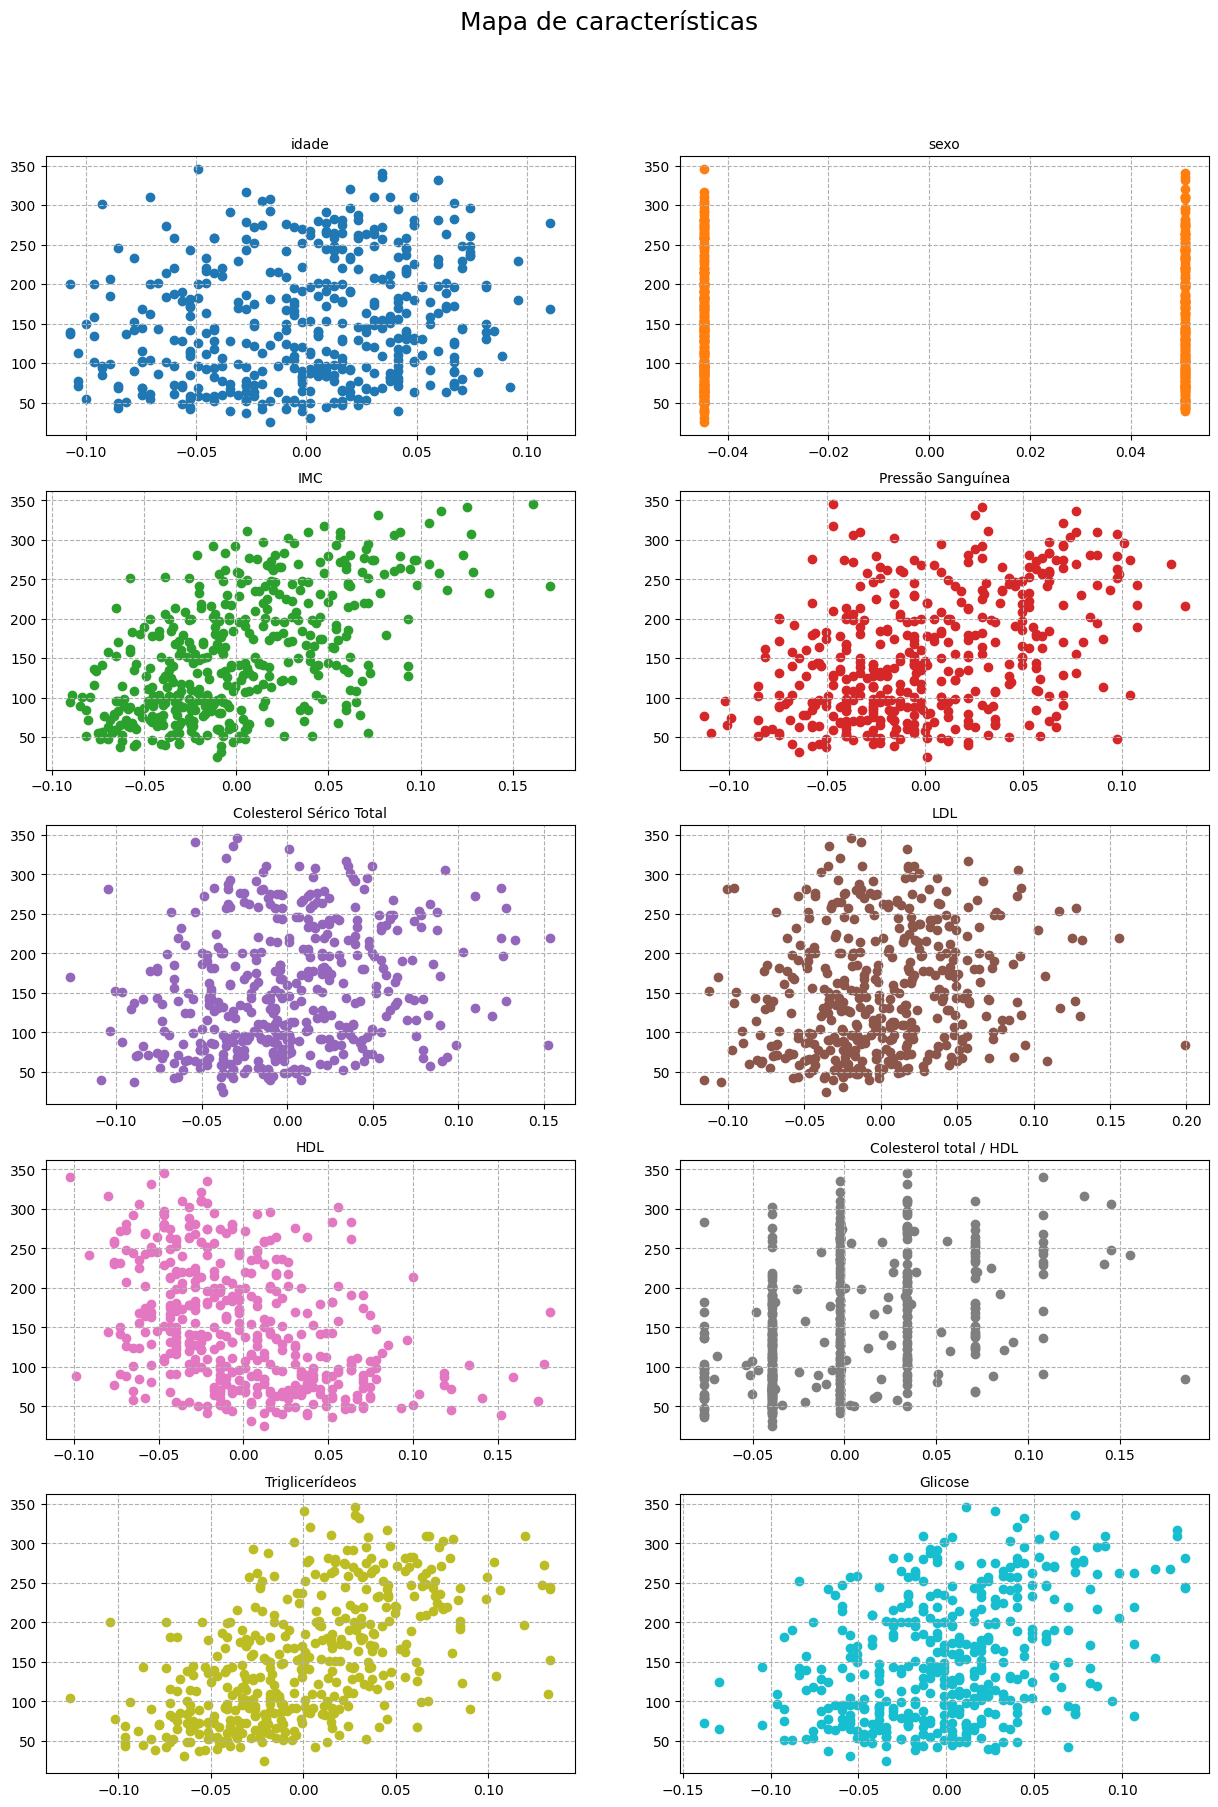

In [12]:
diabetes, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes = pd.DataFrame(diabetes, columns=range(1, 11, 1))
diabetes_y = pd.DataFrame(diabetes_y, columns=(range(1, 2, 1)))

# reset index
diabetes.index += 1
diabetes_y.index += 1 

# descriptor
features_descriptor = ((1, "idade", COLORS[0]), (2, "sexo", COLORS[1]), (3, "IMC", COLORS[2]), (4, "Pressão Sanguínea", COLORS[3]), (5, "Colesterol Sérico Total", COLORS[4]), 
                 (6, "LDL", COLORS[5]), (7, "HDL", COLORS[6]), (8, "Colesterol total / HDL", COLORS[7]), (9, "Triglicerídeos", COLORS[8]), (10, "Glicose", COLORS[9]))

# plot
fig, axs = plt.subplots(5, 2, figsize=FIG_SIZE)
fig.suptitle("Mapa de características", fontsize=TITLE_SIZE, y=0.95)

for ax, feature in zip(axs.ravel(), features_descriptor):
    ax.scatter(diabetes[feature[0]], diabetes_y, color=feature[2])
    ax.set_title(feature[1], fontsize=TEXT_SIZE)
    ax.set_xlabel("")
    ax.grid(linestyle='--')

plt.show()

Para este exemplo vamos utilizar apenas duas características:

3. IMC - índice de massa corporal
4. pressão sanguínea média


In [13]:
diabetes_X = diabetes[[3, 4]]
print(features_descriptor[2:4])

((3, 'IMC', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)), (4, 'Pressão Sanguínea', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)))


### Separando os dados

Agora vamos separar a base de dados em dados de treinamento e teste. Existem várias formas de fazer isso, mais simples e utilizando o algoritmo k-fold. Vamos utilizar a função `train_test_split`. 
Essa função é projetada para ajudar na divisão de um conjunto de dados em subconjuntos de treinamento e teste, permitindo que os modelos de machine learning sejam treinados em parte dos dados e avaliados em outra parte.

1. **Objetivo da Divisão**: O objetivo principal é dividir um conjunto de dados em dois subconjuntos mutuamente exclusivos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para treinar o modelo de machine learning, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos anteriormente.

1. **Entradas**: A função `train_test_split` recebe como entrada os dados que você deseja dividir, bem como opcionalmente as variáveis alvo (rótulos) correspondentes. Geralmente, a entrada é composta pelos recursos (variáveis independentes) e os rótulos (variáveis dependentes) correspondentes.

1. **Parâmetros**: Além dos dados e rótulos, a função `train_test_split` aceita vários outros parâmetros importantes, como test_size (tamanho do conjunto de teste), train_size (tamanho do conjunto de treinamento), random_state (semente para geração de números aleatórios), etc.

1. **Divisão Aleatória**: A função divide os dados de forma aleatória em subconjuntos de treinamento e teste. A proporção entre os dois conjuntos é definida pelo parâmetro test_size (ou train_size se especificado), que geralmente é definido como uma porcentagem do tamanho total do conjunto de dados.

1. **Retorno**: A função retorna quatro objetos: os conjuntos de treinamento de recursos, os conjuntos de teste de recursos, os rótulos de treinamento e os rótulos de teste. Esses objetos podem ser usados para treinar um modelo nos dados de treinamento e avaliá-lo nos dados de teste.

1. **Uso do Modelo**: Com os conjuntos de treinamento e teste separados, você pode treinar um modelo de machine learning usando os dados de treinamento e, em seguida, avaliá-lo nos dados de teste para verificar como ele generaliza para novos dados.

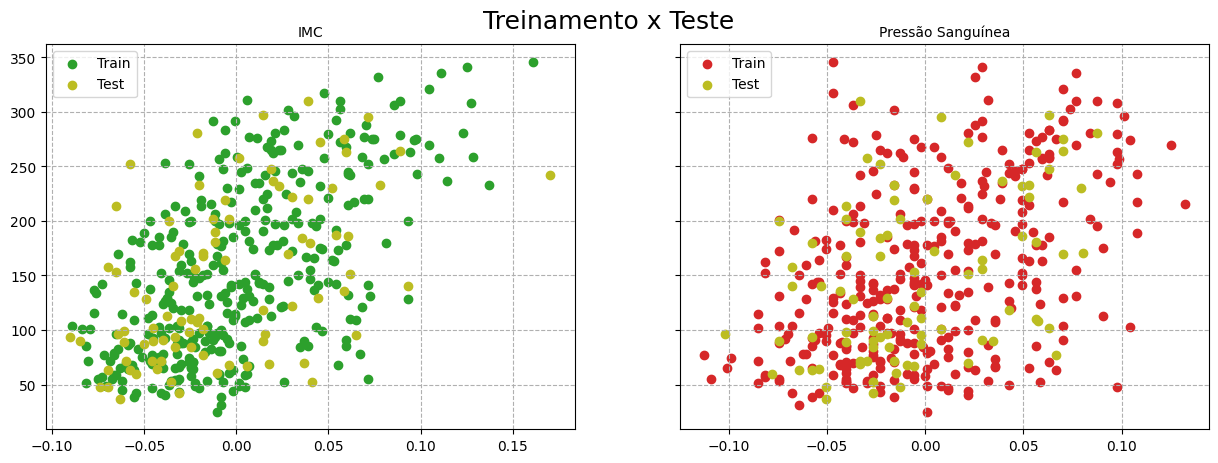

In [14]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=RANDOM_STATE)

# plot
fig, axs = plt.subplots(1, 2, figsize=SM_FIG_SIZE, sharey=True)
fig.suptitle("Treinamento x Teste", fontsize=TITLE_SIZE, y=0.95)

for ax, feature in zip(axs.ravel(), features_descriptor[2:4]):
    ax.scatter(X_train[feature[0]], y_train, color=feature[2], label="Train")
    ax.scatter(X_test[feature[0]], y_test, color=COLORS[8], label="Test")
    ax.set_title(feature[1], fontsize=TEXT_SIZE)
    ax.legend(loc="upper left")
    ax.grid(linestyle='--')

plt.show()

### Modelo

Agora que analisamos o conjunto de dados, vamos criar o modelo de regressão utilizando "Ordinary Least Squares" e depois treiná-lo.

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print("Coeficientes\n", regr.coef_)

Coeficientes
 [[839.51985334 393.45120312]]


Depois de treinar o modelo, vamos predizer e em seguida testar se as predições condizem com o dado real.

### Mean Squared Error

O "Mean Squared Error" (MSE, em português "Erro Quadrático Médio"), é uma métrica utilizada para avaliar a qualidade de um modelo de regressão em relação às previsões que ele faz. O MSE mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais dos dados.

#### Interpretação

Quanto menor o valor do MSE, melhor. Um MSE baixo indica que o modelo está fazendo previsões próximas aos valores reais dos dados. Por outro lado, um MSE alto sugere que o modelo está tendo dificuldade em fazer boas previsões.

### R2 Score

O "R2 score" ou Coeficiente de Determinação ou R-squared, é uma métrica usada para avaliar o desempenho de modelos de regressão. É uma medida da proporção da variabilidade na variável dependente (valor real) que é explicada pelas variáveis independentes (previsões) do modelo.

#### Interpretação

O R2 score varia de 0 a 1 e pode ser interpretado da seguinte maneira:

R2 = 1: Significa que o modelo se ajusta perfeitamente aos dados, ou seja, todas as variações nos valores reais são explicadas pelas previsões do modelo.

R2 = 0: Indica que o modelo não é melhor do que uma linha horizontal que simplesmente prevê a média dos valores reais. Não consegue explicar qualquer variação nos dados.

R2 entre 0 e 1: Indica o grau de ajuste do modelo aos dados reais. Quanto mais próximo de 1, melhor o modelo está em explicar a variação nos dados.

### Avaliando o modelo

Ao usar o MSE e o R2 score em conjunto, é possível ter uma visão mais completa do desempenho do modelo. **Um baixo MSE e um alto R2 score** são indicativos de um bom ajuste do modelo, com previsões próximas aos valores reais e uma alta proporção de variabilidade explicada.

**Se o MSE for baixo, mas o R2 score for baixo**, isso pode sugerir que o modelo está tendo um desempenho razoável na previsão dos valores médios, mas não está explicando bem a variação total dos dados. Isso poderia indicar uma subestimação ou superestimação sistemática.

O MSE pode ser influenciado por outliers, mas o R2 score fornece uma visão mais abrangente da qualidade do modelo, independentemente dos outliers. Portanto, é importante considerar ambos os aspectos.

Coeficientes: 
 [[839.51985334 393.45120312]]
Mean squared error: 3740.51
Coeficiente de determinação: 0.29


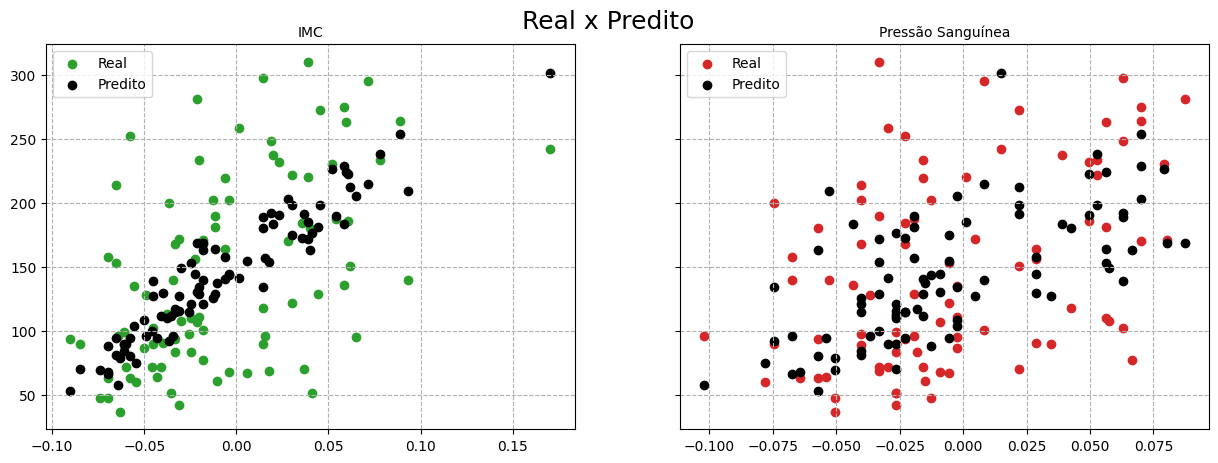

In [16]:
y_pred = regr.predict(X_test)

msquared_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Coeficientes: \n", regr.coef_)
print("Mean squared error: %.2f" % msquared_error)
print("Coeficiente de determinação: %.2f" % r2)

# plot
fig, axs = plt.subplots(1, 2, figsize=SM_FIG_SIZE, sharey=True)
fig.suptitle("Real x Predito", fontsize=TITLE_SIZE, y=0.95)

for ax, feature in zip(axs.ravel(), features_descriptor[2:4]):
    ax.scatter(X_test[feature[0]], y_test, color=feature[2], label="Real")
    ax.scatter(X_test[feature[0]], y_pred, color="black", label="Predito", linewidth=1)

    ax.set_title(feature[1], fontsize=TEXT_SIZE)
    ax.legend(loc="upper left")
    ax.grid(linestyle='--')

plt.show()


### Interpretação

Podemos perceber que o modelo utilizando as duas características acima não está tão bom. Vamos tentar refazê-lo utilizando outras características do conjunto:

9. Triglicerídeos
10. Glicose

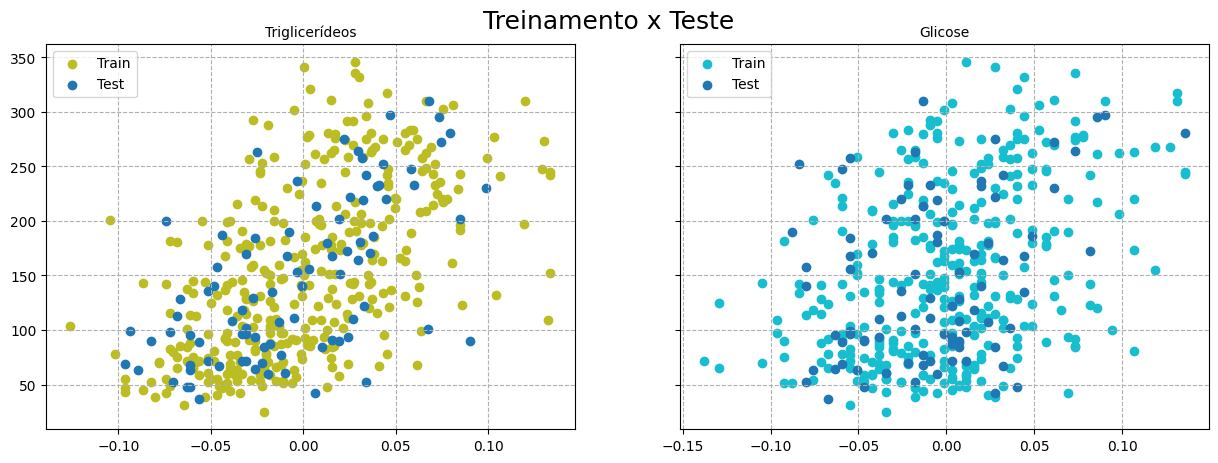

In [17]:
diabetes_X = diabetes[[9, 10]]
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=RANDOM_STATE)

# plot
fig, axs = plt.subplots(1, 2, figsize=SM_FIG_SIZE, sharey=True)
fig.suptitle("Treinamento x Teste", fontsize=TITLE_SIZE, y=0.95)

for ax, feature in zip(axs.ravel(), features_descriptor[8:10]):
    ax.scatter(X_train[feature[0]], y_train, color=feature[2], label="Train")
    ax.scatter(X_test[feature[0]], y_test, color=COLORS[0], label="Test")
    ax.set_title(feature[1], fontsize=TEXT_SIZE)
    ax.legend(loc="upper left")
    ax.grid(linestyle='--')
plt.show()

Vamos ver como os coeficientes são alterados.

Anteriormente os coeficientes eram $839.51985334$ e $ 393.45120312$.

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print("Coeficientes\n", regr.coef_)

Coeficientes
 [[773.52787811 263.58675865]]


Vimos que os valores foram alterados, agora vamos testar novamente a predição.

Coeficientes: 
 [[773.52787811 263.58675865]]
Mean squared error: 3232.95
Coeficiente de determinação: 0.39


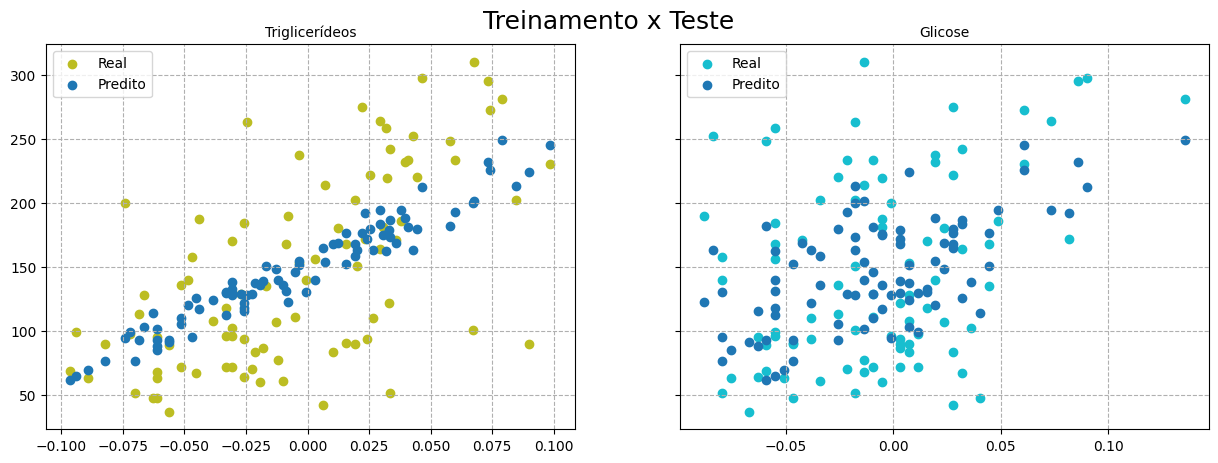

In [19]:
y_pred = regr.predict(X_test)

msquared_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Coeficientes: \n", regr.coef_)
print("Mean squared error: %.2f" % msquared_error)
print("Coeficiente de determinação: %.2f" % r2)

# plot
fig, axs = plt.subplots(1, 2, figsize=SM_FIG_SIZE, sharey=True)
fig.suptitle("Treinamento x Teste", fontsize=TITLE_SIZE, y=0.95)

for ax, feature in zip(axs.ravel(), features_descriptor[8:10]):
    ax.scatter(X_test[feature[0]], y_test, color=feature[2], label="Real")
    ax.scatter(X_test[feature[0]], y_pred, color=COLORS[0], label="Predito")
    ax.set_title(feature[1], fontsize=TEXT_SIZE)
    ax.legend(loc="upper left")
    ax.grid(linestyle='--')


## Conclusão

Percebemos que de acordo com as características usadas no modelo, podemos ter uma melhor condição de previsão de cenários futuros. Também vimos como criar uma regressão simples e como validar que o modelo está "bom".